In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import statsmodels.api as sm  

In [198]:
airlines=pd.read_excel("E:/Ravi_ExcelR_Assignments/Forecasting/Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


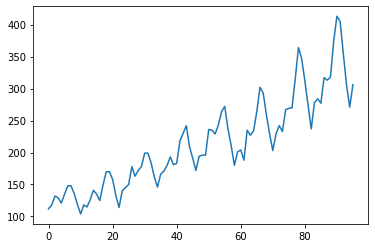

In [199]:
airlines.Passengers.plot() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CF6C90D90>]],
      dtype=object)

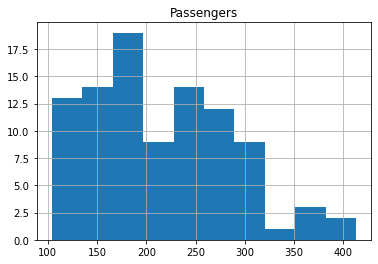

In [200]:
airlines.hist()

In [201]:
airlines["month"] = airlines.Month.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Month.dt.strftime("%Y") # year extraction
airlines

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


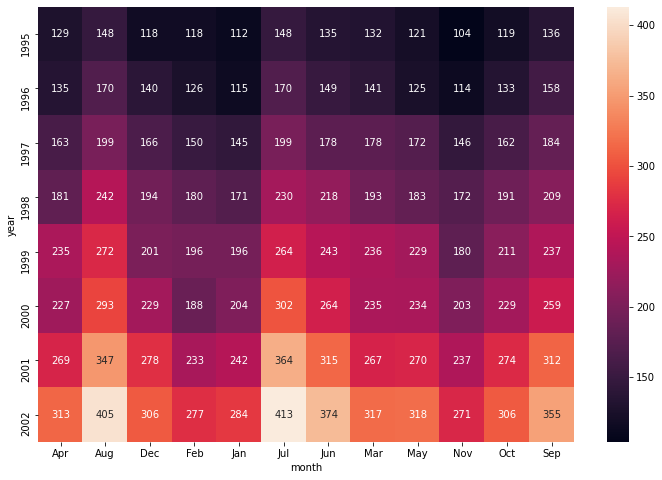

In [202]:
#For Heat Maps
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

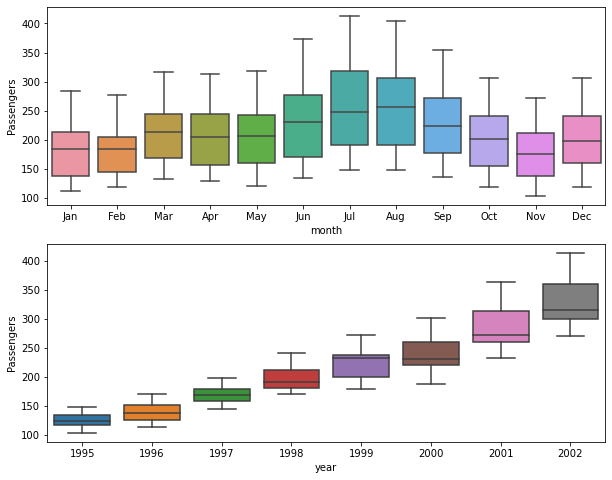

In [203]:
# Boxplot for month and year wise
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airlines)

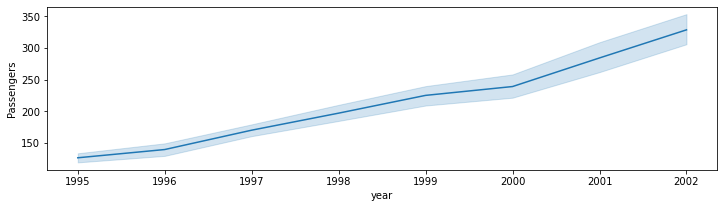

In [204]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airlines) 

In [205]:
#filling categorical variable with dummy values
airlines=pd.get_dummies(airlines,columns=['month']) 
airlines 

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [206]:
airlines.columns

Index(['Month', 'Passengers', 'year', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

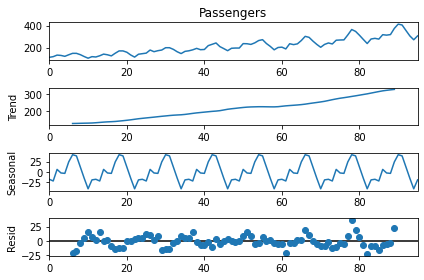

In [207]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts_add.plot()
plt.show() 

In [208]:
Train = airlines.head(80)
Test = airlines.tail(16)  

In [209]:
import statsmodels.formula.api as smf 

In [210]:
#Linear Model
linear_model = smf.ols('Passengers~month_Apr',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['month_Apr'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2)) 
rmse_linear

130.52864798981102

In [211]:
#Exponential

Exp = smf.ols('month_Apr~month_Aug',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['month_Aug'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

317.51518199338705

In [212]:
#Quadratic 

Quad = smf.ols('Passengers~month_Aug+month_Apr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["month_Aug","month_Apr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad 

130.21708193581222

In [178]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea 

129.26647641443301

In [215]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
3,rmse_add_sea,129.266476
2,rmse_Quad,130.217082
0,rmse_linear,130.528648
1,rmse_Exp,317.515182
